In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_json(
    "problems_data.jsonl",
    lines=True,
    encoding="utf-8-sig"
)


In [3]:
df

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree
...,...,...,...,...,...,...,...,...
4107,Tölvunarfræðingar telja,Computer scientists count a bit different from...,Input consists of one line with one integer $n$.,"Output the $n$-th\n number, according to co...","[{'input': '1', 'output': '0'}, {'input': '2',...",easy,1.1,https://open.kattis.com/problems/tolvunarfraed...
4108,Velkomin!,Welcome to Forritunarkeppni Framhaldsskólanna ...,There is no input in this problem.,Print a single line containing VELKOMIN!,"[{'input': '', 'output': 'VELKOMIN!'}]",easy,1.1,https://open.kattis.com/problems/velkomin
4109,Til hamingju,,There is no input in this problem.,Print a single line containing TIL\n HAMING...,"[{'input': '', 'output': 'TIL HAMINGJU MED AFM...",easy,1.1,https://open.kattis.com/problems/tilhamingju
4110,Hipp Hipp,,There is no input in this problem.,Print 20 lines. Each line should contain Hipp ...,"[{'input': '', 'output': 'Hipp hipp hurra! Hip...",easy,1.1,https://open.kattis.com/problems/hipphipp


In [5]:
df["full_text"] = (
    "[TITLE] "  + df["title"].fillna("").astype(str) + " "
    "[DESC] "   + df["description"].fillna("").astype(str) + " "
    "[INPUT] "  + df["input_description"].fillna("").astype(str) + " "
    "[OUTPUT] " + df["output_description"].fillna("").astype(str) + " "
    "[SAMPLE] " + df["sample_io"].fillna("").astype(str)
)

In [7]:
print(df["full_text"].isna().sum())  # should be 0
df["full_text"].head(3)


0


0    [TITLE] Uuu [DESC] Unununium (Uuu) was the nam...
1    [TITLE] House Building [DESC] A number of ecce...
2    [TITLE] Mario or Luigi [DESC] Mario and Luigi ...
Name: full_text, dtype: object

In [8]:
X = df["full_text"]

y_class = df["problem_class"]   # classification target
y_score = df["problem_score"]   # regression target


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(X,y_class,y_score,test_size=0.2,random_state=42,stratify=y_class)


In [11]:
print(X_train.shape, X_test.shape)
print(y_class_train.value_counts(normalize=True))
print(y_class_test.value_counts(normalize=True))


(3289,) (823,)
problem_class
hard      0.471876
medium    0.341745
easy      0.186379
Name: proportion, dtype: float64
problem_class
hard      0.472661
medium    0.341434
easy      0.185905
Name: proportion, dtype: float64


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=True, stop_words="english", ngram_range=(1, 2), max_features=10000)


In [20]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


In [21]:
X_train_tfidf.shape

(3289, 10000)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_class_train)
y_test_enc  = le.transform(y_class_test)

print(le.classes_)  # ['Easy', 'Hard', 'Medium'] (order may vary)


['easy' 'hard' 'medium']


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

Logistic Regression Accuracy: 0.4848116646415553
------------------------------------------------------------
              precision    recall  f1-score   support

        easy       0.47      0.20      0.28       153
        hard       0.53      0.77      0.63       389
      medium       0.36      0.25      0.30       281

    accuracy                           0.48       823
   macro avg       0.45      0.40      0.40       823
weighted avg       0.46      0.48      0.45       823

------------------------------------------------------------


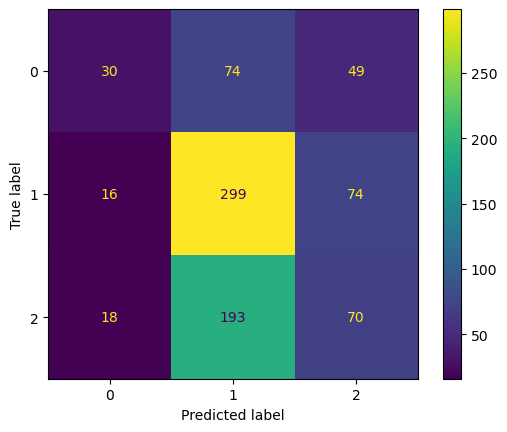

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, n_jobs=-1)

logreg.fit(X_train_tfidf, y_train_enc)
y_pred_lr = logreg.predict(X_test_tfidf)
acc_lr = accuracy_score(y_test_enc, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print("--"*30)

print(classification_report(y_test_enc, y_pred_lr, target_names=le.classes_))
print("--"*30)

cm = confusion_matrix(y_test_enc, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot()
plt.show()

Decision Tree Accuracy: 0.47023086269744835
------------------------------------------------------------
              precision    recall  f1-score   support

        easy       0.38      0.40      0.39       153
        hard       0.54      0.69      0.60       389
      medium       0.35      0.20      0.25       281

    accuracy                           0.47       823
   macro avg       0.42      0.43      0.42       823
weighted avg       0.44      0.47      0.45       823

------------------------------------------------------------


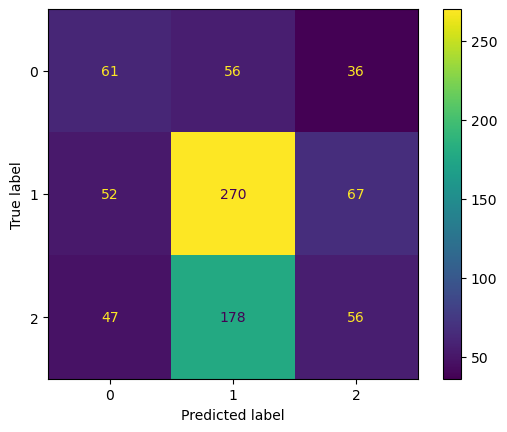

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7,min_samples_leaf=5, min_samples_split=10,random_state=42)

dt.fit(X_train_tfidf, y_train_enc)
y_pred_dt = dt.predict(X_test_tfidf)
acc_dt = accuracy_score(y_test_enc, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print("--"*30)
print(classification_report(y_test_enc, y_pred_dt, target_names=le.classes_))
print("--"*30)
cm = confusion_matrix(y_test_enc, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot()
plt.show()

Random Forest Accuracy: 0.5054678007290401
------------------------------------------------------------
              precision    recall  f1-score   support

        easy       0.57      0.27      0.37       153
        hard       0.52      0.84      0.65       389
      medium       0.38      0.17      0.23       281

    accuracy                           0.51       823
   macro avg       0.49      0.43      0.42       823
weighted avg       0.48      0.51      0.45       823

------------------------------------------------------------


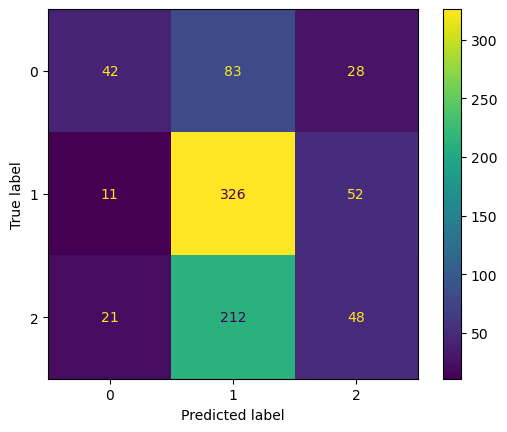

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_tfidf, y_train_enc)

y_pred_rf = rf.predict(X_test_tfidf)
acc_rf = accuracy_score(y_test_enc, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print("--"*30)
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))
print("--"*30)
cm = confusion_matrix(y_test_enc, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot()
plt.show()

XGBoost Accuracy: 0.4738760631834751
------------------------------------------------------------
              precision    recall  f1-score   support

        easy       1.00      0.01      0.01       153
        hard       0.47      1.00      0.64       389
      medium       0.00      0.00      0.00       281

    accuracy                           0.47       823
   macro avg       0.49      0.34      0.22       823
weighted avg       0.41      0.47      0.31       823

------------------------------------------------------------


c:\Users\awate\.conda\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\awate\.conda\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\awate\.conda\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


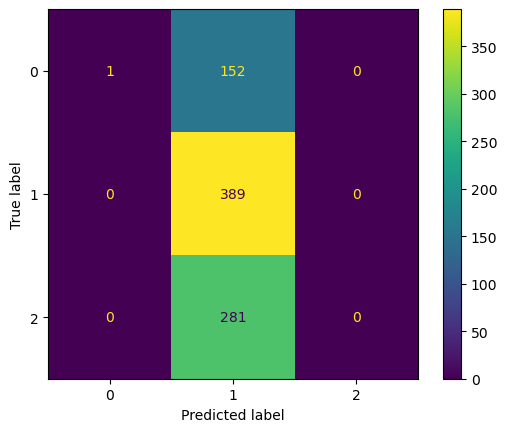

In [89]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=2000,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softmax",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    device="cuda",
    random_state=42
)

xgb.fit(X_train_tfidf, y_train_enc)
y_pred_xgb = xgb.predict(X_test_tfidf)
acc_xgb = accuracy_score(y_test_enc, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)
print("--"*30)
print(classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))
print("--"*30)
cm = confusion_matrix(y_test_enc, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot()
plt.show()


KNN accuracy: 0.47144592952612396
------------------------------------------------------------
              precision    recall  f1-score   support

        easy       0.41      0.18      0.25       153
        hard       0.52      0.77      0.62       389
      medium       0.35      0.21      0.26       281

    accuracy                           0.47       823
   macro avg       0.42      0.39      0.38       823
weighted avg       0.44      0.47      0.43       823

------------------------------------------------------------


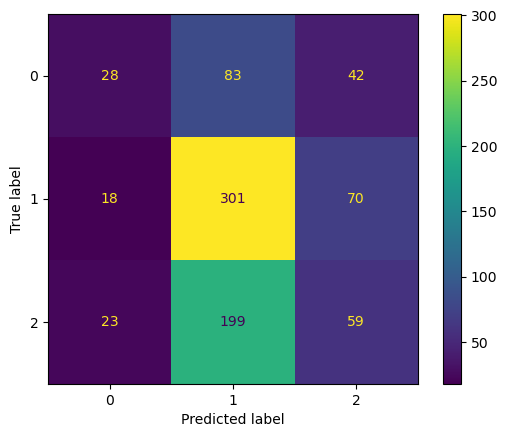

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_tfidf, y_train_enc)
y_pred_knn = knn.predict(X_test_tfidf)
acc_knn = accuracy_score(y_test_enc, y_pred_knn)
print("KNN accuracy:", acc_knn)
print("--"*30)
print(classification_report(y_test_enc, y_pred_knn, target_names=le.classes_))
print("--"*30)
cm = confusion_matrix(y_test_enc, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= logreg.classes_)
disp.plot()
plt.show()

In [75]:
results = {
    "Logistic Regression": acc_lr,
    "Decision Tree": acc_dt,
    "Random Forest": acc_rf,
    "XGBoost": acc_xgb,
    "KNN": acc_knn
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.4848
Decision Tree: 0.4702
Random Forest: 0.5152
XGBoost: 0.4727
KNN: 0.4714


Lets do regression now

In [96]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [91]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [98]:
lr = Ridge()
lr.fit(X_train_tfidf, y_score_train)
ypred_lr = lr.predict(X_test_tfidf)
rmse_lr = root_mean_squared_error(y_score_test,ypred_lr)
r2_lr = r2_score(y_true=y_score_test, y_pred= ypred_lr)
print("LinearRegression")
print("RMSE: ", rmse_lr)
print("R2 score: ",r2_lr)

LinearRegression
RMSE:  2.0686406130163317
R2 score:  0.11817034491400857


tried linear_reg and lasso too but negative r2 score 

In [104]:
dt = DecisionTreeRegressor(max_depth=7,min_samples_leaf=5, min_samples_split=10,random_state=4)
dt.fit(X_train_tfidf, y_score_train)
ypred_dt = dt.predict(X_test_tfidf)
rmse_dt = root_mean_squared_error(y_score_test,ypred_dt)
r2_dt = r2_score(y_true=y_score_test, y_pred= ypred_dt)
print("Decision Tree")
print("RMSE: ", rmse_dt)
print("R2 score: ",r2_dt)

Decision Tree
RMSE:  2.1816453408485117
R2 score:  0.01919446543530201


In [110]:
rf = RandomForestRegressor()
rf.fit(X_train_tfidf, y_score_train)
ypred_rf = rf.predict(X_test_tfidf)
rmse_rf = root_mean_squared_error(y_score_test,ypred_rf)
r2_rf = r2_score(y_true=y_score_test, y_pred= ypred_rf)
print("RandomForest")
print("RMSE: ", rmse_rf)
print("R2 score: ",r2_rf)

RandomForest
RMSE:  2.0405945122801823
R2 score:  0.1419194958369756


In [115]:
xgb = XGBRegressor(n_estimators=2000,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="rmse",
    device="cuda",
    random_state=42)
xgb.fit(X_train_tfidf, y_score_train)
ypred_xgb = xgb.predict(X_test_tfidf)
rmse_xgb = root_mean_squared_error(y_score_test,ypred_xgb)
r2_xgb = r2_score(y_true=y_score_test, y_pred= ypred_xgb)
print("XGBoost")
print("RMSE: ", rmse_xgb)
print("R2 score: ",r2_xgb)

XGBoost
RMSE:  2.612765288919588e+18
R2 score:  -1.4067450690127364e+36


In [112]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train_tfidf, y_score_train)
ypred_knn = knn.predict(X_test_tfidf)
rmse_knn = root_mean_squared_error(y_score_test,ypred_knn)
r2_knn = r2_score(y_true=y_score_test, y_pred= ypred_knn)
print("KNN")
print("RMSE: ", rmse_knn)
print("R2 score: ",r2_knn)

KNN
RMSE:  2.1439788246356413
R2 score:  0.0527696835658471
